In [348]:
import sklearn
# Import diabetes
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
diabetes.target, random_state=2509)
print(X_train.shape)
print(X_test.shape)


(331, 10)
(111, 10)


In [356]:
# Just to check if SVM is working

from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
diabetes.target, random_state=2509)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print(svm.score(X_test, y_test))

0.009009009009009009


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [357]:
# learning an SVM on the scaled training data:
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set:
print(svm.score(X_test_scaled, y_test))

0.009009009009009009


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [377]:
data.shape

(442, 11)

In [216]:
# Check the description

print(diabetes.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [385]:
# The task at hand is to predict disease progression from physiological variables.

In [218]:
# Normalize the data



In [219]:
# transform data


In [220]:
# transform test data


In [221]:
# Check Linear regression model

from sklearn import linear_model

In [222]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

print(regr.coef_)

[ -37.6457136  -283.52963516  544.88293088  326.40352249 -711.97585107
  410.18288208   51.77074959  179.72520537  697.90581641   50.91481612]


In [223]:
import numpy as np

In [224]:
# The mean square error for test
np.mean((regr.predict(X_test) - y_test)**2)

2524.1647547328043

In [225]:
# The mean square error for train
np.mean((regr.predict(X_train) - y_train)**2)

2989.3852488373027

In [226]:
regr.score(X_test,y_test)

0.5363269597446434

In [227]:
regr.score(X_train,y_train)

0.5092946474416031

In [228]:
# Lasso

regr = linear_model.Lasso()


In [229]:
# Alpha coeficient 

alphas = np.logspace(-4, -1, 6)

In [230]:
scores = [regr.set_params(alpha=alpha)
          .fit(X_train, y_train)
          .score(X_test, y_test) 
          for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]
regr.alpha = best_alpha
regr.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [231]:
print(regr.coef_)

[ -37.54387481 -283.42739394  544.90641884  326.292012   -703.73415153
  403.88010662   47.89296553  178.26912546  695.03578624   50.88786985]


In [232]:
from sklearn.linear_model import Lasso

In [233]:
# I don't know how to get the Lasso test and train R**2. I will try in a different way 
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [234]:
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.35126501039731695
test score:  0.3776703390961572
number of features used:  3


In [235]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [236]:
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

In [237]:
print ("training score for alpha=0.01:", train_score001)
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)

training score for alpha=0.01: 0.5077665408846104
test score for alpha =0.01:  0.5330202804857334
number of features used: for alpha =0.01: 9


In [238]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [239]:
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

In [240]:
print ("training score for alpha=0.0001:", train_score00001)
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.5092942660898914
test score for alpha =0.0001:  0.536305060641824
number of features used: for alpha =0.0001: 10


In [241]:

from sklearn.linear_model import LinearRegression

In [242]:
# Just to check linear regression

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

In [243]:
print ("LR training score:", lr_train_score)
print ("LR test score: ", lr_test_score)

LR training score: 0.5092946474416031
LR test score:  0.5363269597446434


In [244]:
# These scores as the same as the above linear regression scores

In [245]:
# This part is not necessary, i was trying to check lasso test and train R**2

lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)

In [246]:
np.mean((lasso.predict(X_test) - y_test)**2)

3387.8670086429515

In [247]:
np.mean((lasso.predict(X_train) - y_train)**2)

3952.1044517077908

In [248]:
# Features used

num_coef=np.sum(lasso.coef_!=0)
print(num_coef)
lasso.coef_

3


array([  0.        ,  -0.        , 409.05499972,   2.0440825 ,
         0.        ,   0.        ,  -0.        ,   0.        ,
       272.51825049,   0.        ])

In [249]:
# Plotting Lasso

import matplotlib.pyplot as plt 

%matplotlib inline  

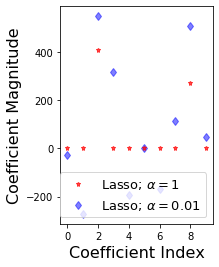

In [250]:
plt.subplot(1,2,1)

plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)

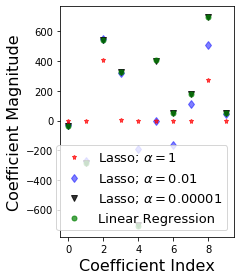

In [251]:
plt.subplot(1,2,2)

plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()

plt.show()

In [345]:
from sklearn.svm import SVC


In [346]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
diabetes.target, random_state=2509)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print(svm.score(X_test, y_test))

AttributeError: 'DataFrame' object has no attribute 'data'

In [252]:
# 4. Now load the original diabetes dataset from the web page

In [372]:
from pandas import read_csv



In [386]:
diabetes = read_csv('diabetes.txt', sep = '\t')

data = diabetes.values

In [387]:
data.shape

(442, 11)

In [388]:
diabetes.head()

,GE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [389]:
# 5. Split the dataset into the training and test sets. Use your birthday (in the
# format DDMM) as random_state.


X,y=data[:, :10], data[:,-10]    
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2509)


In [390]:
# Normalized it first

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [391]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [392]:
# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print(X_train_scaled.shape)
print(X_train.min(axis=0))
print(X_train.max(axis=0))
print(X_train_scaled.min(axis=0))
print(X_train_scaled.max(axis=0))

(331, 10)
[19.      1.     18.5    63.     97.     43.4    23.      2.      3.4965
 58.    ]
[ 79.      2.     42.2   133.    300.    242.4    98.      9.09    6.107
 124.   ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [383]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print(X_test_scaled.min(axis=0))
print(X_test_scaled.max(axis=0))


[ 0.          0.         -0.02109705 -0.01428571  0.06403941 -0.00904523
 -0.01333333  0.         -0.0913235   0.16666667]
[1.         1.         0.86919831 0.9        1.00492611 0.86231156
 1.01333333 0.70521862 0.99486688 0.89393939]


In [363]:
# 6. Repeat item 3 for the current dataset. Comment on the differences from
# what you saw in item 3

In [325]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

print(regr.coef_)

[ -0.13674033 -27.02606445   5.87289559   1.12373265  -0.9795944
   0.64220181   0.19055676   6.63184782  63.6167035    0.21090241]


In [326]:
# The mean square error for test
np.mean((regr.predict(X_test) - y_test)**2)

2524.153675390571

In [300]:
# The mean square error for train
np.mean((regr.predict(X_train) - y_train)**2)

2989.3968133672774

In [301]:
# Different methods

lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [302]:
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.5019194437388421
test score:  0.5251393442072638
number of features used:  9


In [354]:
# let's try lab 6

from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X,
y, random_state=2509)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print(svm.score(X_test, y_test))

0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [355]:
# learning an SVM on the scaled training data:
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set:
print(svm.score(X_test_scaled, y_test))

0.009009009009009009


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [25]:
# naive grid search implementation
X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
diabetes.target, random_state=0)
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
     # for each combination of parameters, train an SVM
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVM on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_C = C
        best_gamma = gamma
print("Best score:", best_score)
print("Best parameters C and gamma:", best_C, best_gamma)

Best score: 0.018018018018018018
Best parameters C and gamma: 100 0.001


In [ ]:
# https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

In [ ]:
# https://towardsdatascience.com/data-science-explaining-r%C2%B2-in-statistics-6f34e7f0a9bb

# https://www.geeksforgeeks.org/implementation-of-lasso-regression-from-scratch-using-python/

# https://scikit-learn.org/stable/modules/preprocessing.html

# https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html